# Figures for LCDM directory
This notebooks generates figures to visualise the distance and other parameter computations from `friedmannequations.py`. See the directory's README for further detail.

In [2]:
!python friedmann equations.py # run data creating script in case don't run before

python: can't open file '/Users/joanalnu/Library/Mobile Documents/com~apple~CloudDocs/research/dark-energy-theory/LCDM/code/friedmann': [Errno 2] No such file or directory


In [4]:
import pandas as pd

def read_data():
    """
    Read the Friedmann equation data from a CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the Friedmann equation data.
    """
    # Replace 'friedmann_data.csv' with the path to your CSV file
    df = pd.read_csv('../data/cosmological_distances.csv')
    return df

data = read_data()

In [5]:
import matplotlib.pyplot as plt
def plot_distances(df, xaxis='Redshift (z)'):
    """
    Plot the distances from the Friedmann equation data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the Friedmann equation data.
    """
    plt.figure(figsize=(10, 6))
    # plt.plot(df['Big Bang to z Travel Time (Gyr)'].iloc[0:1194], df['Comoving Distance (Mpc)'].iloc[0:1194], label='Comoving')
    plt.plot(df[xaxis].iloc[0:1000], df['Luminosity Distance (Mpc)'].iloc[0:1000], label='Luminosity')
    plt.plot(df[xaxis].iloc[0:1000], df['Proper Distance (Mpc)'].iloc[0:1000], label='Proper')
    plt.plot(df[xaxis].iloc[0:1000], df['Angular Distance (Mpc)'].iloc[0:1000], label='Angular')
    plt.title(f'Distances vs {xaxis}')
    plt.xlabel(f'{xaxis}')
    plt.ylabel(r'Distances ($Mpc$)')
    plt.loglog()
    plt.legend()
    plt.grid()
    return plt

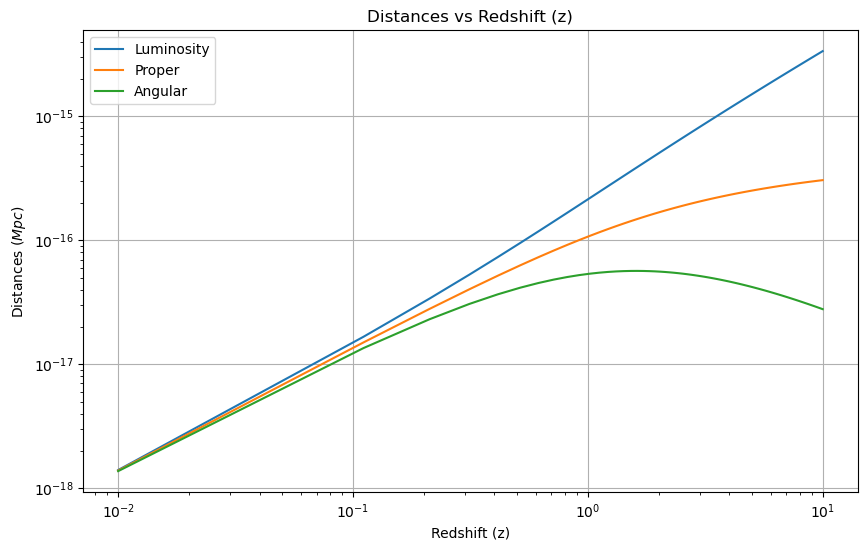

In [7]:
figure = plot_distances(data)
figure.savefig('../figures/distances_vs_redshift.png')

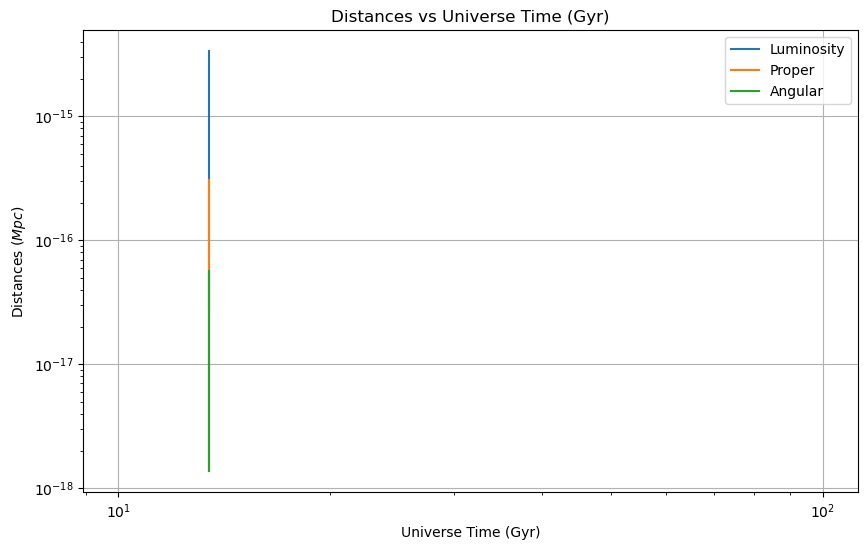

In [8]:
figure = plot_distances(data, xaxis='Universe Time (Gyr)')
figure.savefig('../figures/distances_vs_universetime.png')

# Time - Redshift

In [9]:
def plot_time_vs_redshift(df):
    """
    Plot the time vs redshift from the Friedmann equation data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the Friedmann equation data.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df['Redshift (z)'].iloc[0:1000], df['Big Bang to z Travel Time (Gyr)'].iloc[0:1000], label='Big Bang to now')
    plt.title('Time vs Redshift')
    plt.xlabel('Redshift (z)')
    plt.ylabel('Time (Gyr)')
    plt.legend()
    plt.grid()
    return plt

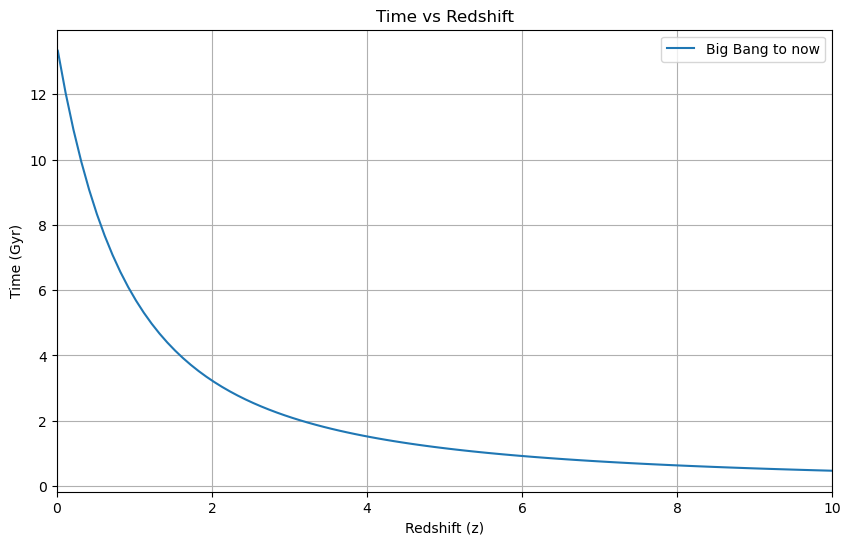

In [11]:
fig = plot_time_vs_redshift(data)
fig.xlim(0, 10)
fig.savefig('../figures/time_vs_redshift.png')

# Scale Factor - Redshift/Time

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from parameters import OmegaM, OmegaDE, OmegaR, H0

# Constants
H0_SI = H0 / 3.0857e19  # Convert H0 to s⁻¹
to_gyr = 3.1536e16  # seconds per Gyr

# Redshift and corresponding scale factor
redshift = np.linspace(-1000, 1000, 100000)
a_vals = 1 / (1 + redshift)
OmegaK = 1.0 - (OmegaM + OmegaDE + OmegaR)

# Time from Big Bang to given scale factor a
def cosmic_time_from_big_bang(a, OmegaK):
    def time_integrand(a, OmegaK):
        H_sq = OmegaDE + OmegaM * a**-3 + OmegaR * a**-4 + OmegaK * a**-2
        return 1.0 / (a * np.sqrt(H_sq))
    integral, _ = quad(time_integrand, 0, a, args=(OmegaK))
    return (1 / H0_SI) * integral  # seconds

# Generate time values (one per scale factor)
time_gyr = np.array([cosmic_time_from_big_bang(ai, OmegaK) for ai in a_vals]) / to_gyr  # Gyr

# Plot scale factor vs cosmic time
def plot_scale_factor_with_time():
    """
    Plot the scale factor from the Friedmann equation data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the Friedmann equation data.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(time_gyr, a_vals, label='Scale Factor $a(t)$')
    plt.xlabel('Time since Big Bang (Gyr)')
    plt.ylabel('Scale Factor $a$')
    plt.title('Scale Factor vs Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    # add line for z = 0
    # calculate t for z = 0 and a = 1
    a_0 = 1.0
    t_0 = cosmic_time_from_big_bang(a_0, OmegaK) / to_gyr  # Gyr
    print(f"Time at z=0: {t_0:.2f} Gyr")
    fig.axvline(x=t_0, color='r', linestyle='--', label='z = 0')
    fig.xlim(0, 30)
    fig.ylim(0,2.5)
    
    return plt

/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_9803/2041167667.py:19: RuntimeWarning: invalid value encountered in sqrt
  return 1.0 / (a * np.sqrt(H_sq))
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_9803/2041167667.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(time_integrand, 0, a, args=(OmegaK))


Time at z=0: 13.48 Gyr


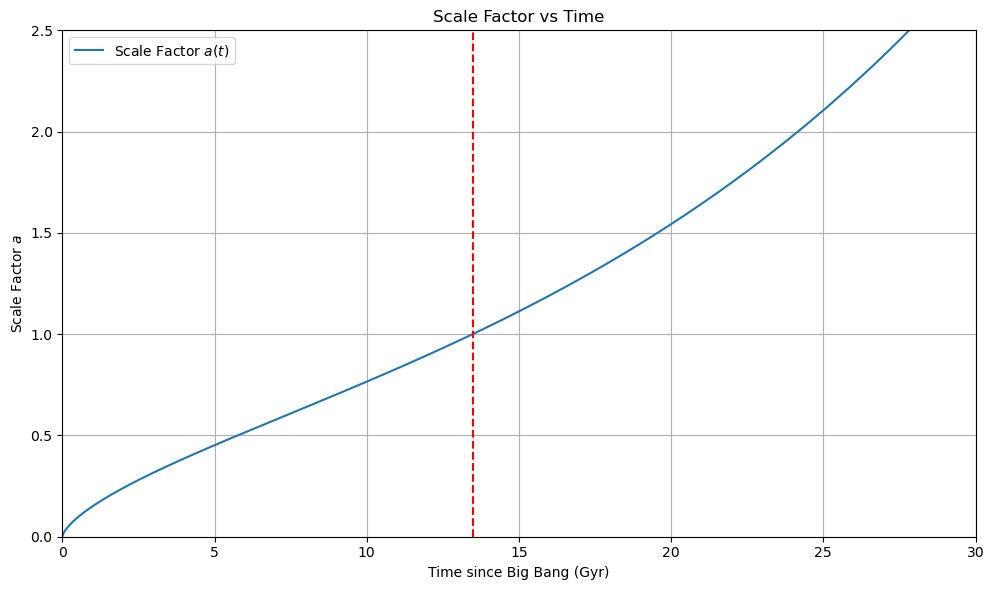

In [16]:
fig = plot_scale_factor_with_time()
#fig.yscale('log')
fig.savefig('../figures/scalefactor_vs_lighttraveltime.png')

## Further Graphics from ResultadosEjemplos.pdf

  0%|          | 0/4 [00:00<?, ?it/s]/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_9803/2912590948.py:33: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(time_integrand, epsilon, a, args=(OmegaM, OmegaDE, OmegaR))
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_9803/2912590948.py:33: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral, _ = quad(time_integrand, epsilon, a, args=(OmegaM, OmegaDE, OmegaR))
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_9803/2912590948.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If

Time at z=0 for Ω_m=0.3, Ω_DE=0.69, Ω_r=0.01: 13.01 Gyr


 50%|█████     | 2/4 [02:24<02:48, 84.09s/it]

Time at z=0 for Ω_m=1.0, Ω_DE=0.0, Ω_r=0.0: 9.32 Gyr


 75%|███████▌  | 3/4 [05:30<02:10, 130.61s/it]

Time at z=0 for Ω_m=0.0, Ω_DE=1.0, Ω_r=0.0: 321.86 Gyr


100%|██████████| 4/4 [05:33<00:00, 83.32s/it] 

Time at z=0 for Ω_m=0.0, Ω_DE=0.0, Ω_r=1.0: 6.99 Gyr


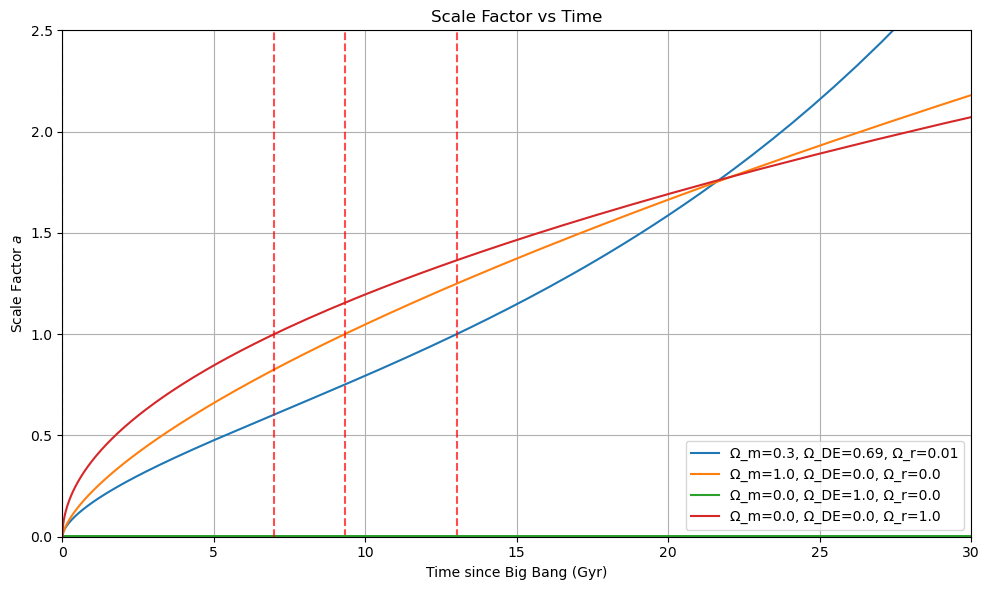

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from tqdm import tqdm

# redefine parameters
OmegaK = 0.0
parameters = [
    # OmegaM OmegaDE OmegaR
    [0.3, 0.69, 0.01],
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0]
]

# Constants
H0 = 70.0  # km/s/Mpc (assuming this was defined elsewhere)
H0_SI = H0 / 3.0857e19  # Convert H0 to s⁻¹
to_gyr = 3.1536e16  # seconds per Gyr

# Redshift and corresponding scale factor
redshift = np.linspace(-1000, 1000, 100000)
a_vals = 1 / (1 + redshift)

# Time from Big Bang to given scale factor a
def cosmic_time_from_big_bang(a, OmegaM, OmegaDE, OmegaR):
    def time_integrand(a, OmegaM, OmegaDE, OmegaR):
        H_sq = OmegaM * a**-3 + OmegaDE + OmegaR * a**-4 # + OmegaK * a**-2
        # Add a small epsilon to avoid division by zero and negative values
        return 1.0 / (a * np.sqrt(np.maximum(H_sq, 1e-30)))
    
    epsilon = 1e-10
    integral, _ = quad(time_integrand, epsilon, a, args=(OmegaM, OmegaDE, OmegaR))
    return (1 / H0_SI) * integral

# Plot scale factor vs cosmic time
def plot_scale_factor_with_time(ax, time_gyr, a_vals, label):
    ax.plot(time_gyr, a_vals, label=label)
    ax.set_xlabel('Time since Big Bang (Gyr)')
    ax.set_ylabel('Scale Factor $a$')
    ax.set_title('Scale Factor vs Time')
    ax.grid(True)
    return ax

# Create single figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Labels for each parameter set
labels = [
    'Ω_m=0.3, Ω_DE=0.69, Ω_r=0.01',
    'Ω_m=1.0, Ω_DE=0.0, Ω_r=0.0',
    'Ω_m=0.0, Ω_DE=1.0, Ω_r=0.0',
    'Ω_m=0.0, Ω_DE=0.0, Ω_r=1.0'
]

for i, pset in enumerate(tqdm(parameters)):
    Om, Ode, Or = pset
    
    # Generate time values (one per scale factor)
    time_gyr = np.array([cosmic_time_from_big_bang(ai, Om, Ode, Or) for ai in a_vals]) / to_gyr  # Gyr
    
    plot_scale_factor_with_time(ax, time_gyr, a_vals, labels[i])
    
    # add line for z = 0
    a_0 = 1.0
    t_0 = cosmic_time_from_big_bang(a_0, Om, Ode, Or) / to_gyr  # Gyr
    print(f"Time at z=0 for {labels[i]}: {t_0:.2f} Gyr")
    ax.axvline(x=t_0, color='r', linestyle='--', alpha=0.7)

# Set limits and add legend after all plots are done
ax.set_xlim(0, 30)
ax.set_ylim(0, 2.5)
ax.legend()

# Add a single z=0 label to legend (instead of multiple)
ax.axvline(x=0, color='r', linestyle='--', alpha=0.7, label='z = 0')

fig.tight_layout()
fig.savefig('../figures/scalefactor_timesincebigbang_evolution.png')